# Problem Statement:


- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. state. 

# Approach:
We will be following below step-wise approach:
1. Reading and Understanding the Data
2. Exploratory Data Analysis
3. Preparing the Data for Model
4. Training the model
5. Residual Analysis
6. Predictions and evaluating model on the test sett

## Reading and Understanding the Data

In [5]:
#Let us import the necessary liberaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
#let us now load the dataset and have a sneak peak at the data
day=pd.read_csv('day.csv')

In [7]:
#lets have a look at the data now:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
day.shape

(730, 16)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#Correcting the data type of dteday
day['dteday']=pd.DatetimeIndex(day.dteday)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
#checking the null rows in the data
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data looks fine as of now, we will now re-assign the values of categorical variables using data dictionary provided

#### We are re-assigning the values for mnth,season,weekday abd weathersit for the sake of EDA and eventually to use them as dummy variables

In [14]:
#Let's re-assign the seasons to their respective values using the data dictionary provided:
day['season'].replace({1:'spring',2: 'summer',3: 'fall',4:'winter'}, inplace=True)

C:\Users\Addie\AppData\Local\Temp\ipykernel_32732\2011747868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['season'].replace({1:'spring',2: 'summer',3: 'fall',4:'winter'}, inplace=True)


In [15]:
# We now need to convert the data-type of season to string
day.season=day['season'].astype('string')
print(day['season'].dtype)

string


In [16]:
#Let's re-assign the mnth to their respective values using the data dictionary provided:
day['mnth'].replace({1:'Jan',2: 'Feb',3: 'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)

C:\Users\Addie\AppData\Local\Temp\ipykernel_32732\3376702663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['mnth'].replace({1:'Jan',2: 'Feb',3: 'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace=True)


In [17]:
# We now need to convert the data-type of mnth to string
day.mnth=day['mnth'].astype('string')
print(day['mnth'].dtype)

string


In [18]:
#Let's re-assign the weekday to their respective values using the data dictionary provided:
day['weekday'].replace({0:'Sun',1:'Mon',2: 'Tue',3: 'Wed',4:'Thu',5:'Fri',6:'Sat'}, inplace=True)

C:\Users\Addie\AppData\Local\Temp\ipykernel_32732\1859954888.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['weekday'].replace({0:'Sun',1:'Mon',2: 'Tue',3: 'Wed',4:'Thu',5:'Fri',6:'Sat'}, inplace=True)


In [19]:
# We now need to convert the data-type of weekday to string
day.weekday=day['weekday'].astype('string')
print(day['weekday'].dtype)

string


In [20]:
#Let's re-assign the seasons to their respective values using the data dictionary provided:
day['weathersit'].replace({1:'Clear',2: 'Mist',3: 'Light_Snow',4:'Heavy_Rain'}, inplace=True)

C:\Users\Addie\AppData\Local\Temp\ipykernel_32732\3692548646.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['weathersit'].replace({1:'Clear',2: 'Mist',3: 'Light_Snow',4:'Heavy_Rain'}, inplace=True)


In [21]:
# We now need to convert the data-type of weathersit to string
day.weathersit=day['weathersit'].astype('string')
print(day['weathersit'].dtype)

string


In [22]:
#Checking value counts to varify if conversion is executed correctly
day.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: Int64

In [23]:
#Checking value counts to varify if conversion is executed correctly
day.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: Int64

In [24]:
#Checking value counts to varify if conversion is executed correctly
day.weekday.value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: Int64

In [25]:
#Checking value counts to varify if conversion is executed correctly
day.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light_Snow     21
Name: count, dtype: Int64

## Exploratory Data Analysis
Let's now move on to step 2 which is EDA, here we will look for the relevant data and will be performing, our target variable will be cnt:
- Univariate Data Analysis
- Bivariate Data Analysis
- Multi-variate Data Analysis

In [27]:
# From data.head() we can see that the columns 'instant','casual','dteday' and 'registered' doesn't hold much singinficance as they are just breakdown of our target variable cnt
#dropping 'instant,''casual', 'dteday' and 'registered'.
# We dropped yr as it's an arbitary feature having not much impact on our model

day.drop(columns=['instant','casual','registered','dteday'],inplace=True)

In [28]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
day.shape

(730, 12)

#### Univariate Analysis

In [31]:
# Let's look at the statistical aspect of the data, we are using all the variables but we need to look at only the continous variables
day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


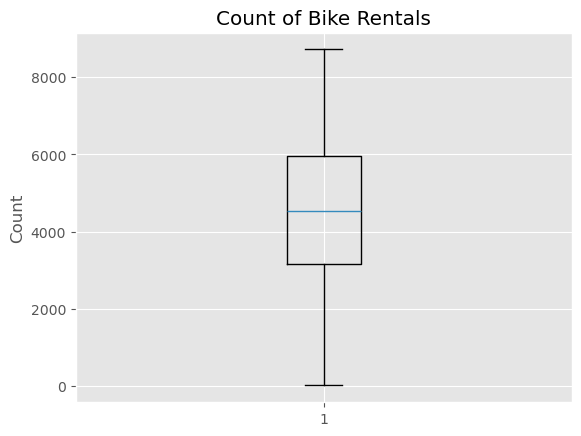

In [32]:
# Let's plot some charts to check the data:
#Checking cnt for outliers
plt.style.use('ggplot')
plt.boxplot(day.cnt)
plt.title('Count of Bike Rentals')
plt.ylabel('Count')
plt.show()

- no outliers detected in target variable cnt and it lies between the range 3000 to 6000

#### Segmented univariate and Bivariate Analysis:

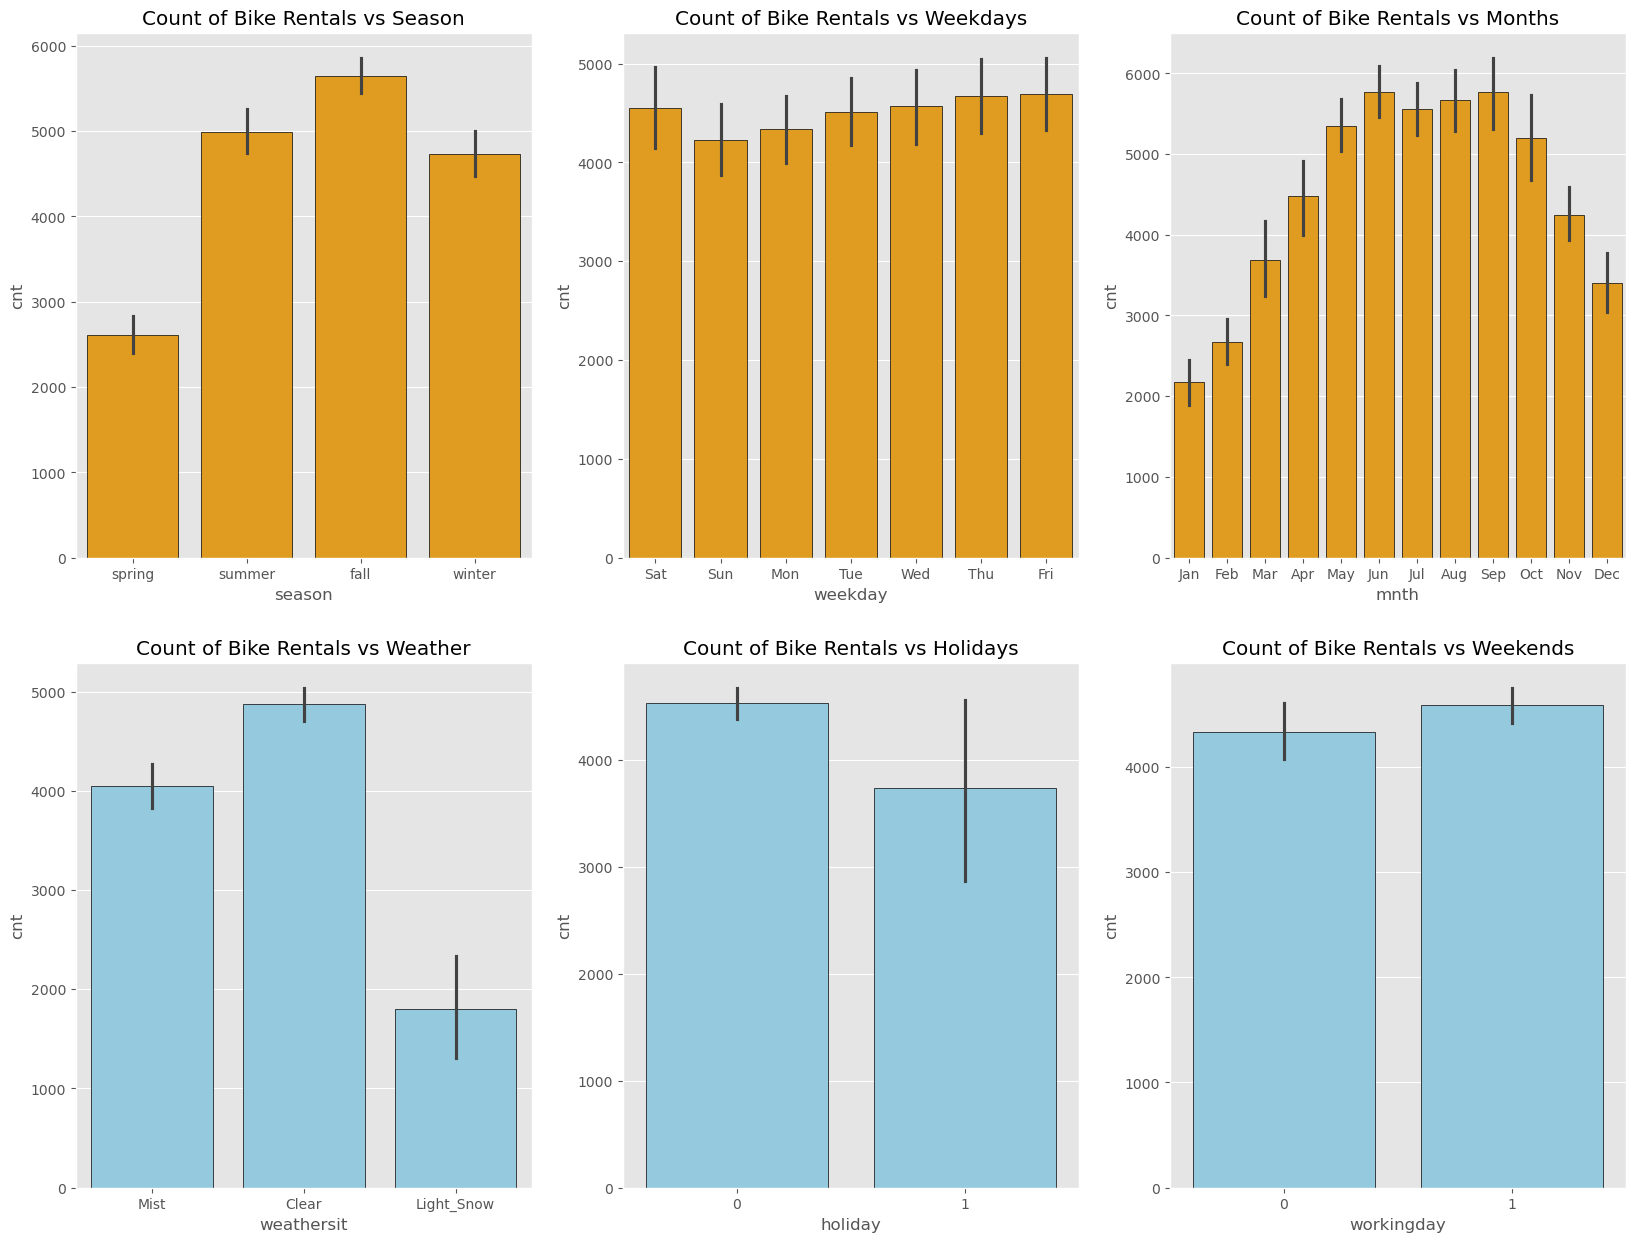

In [35]:
# Let's start with Segmented univariate Analysis for Categorical variables:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.barplot(x='season', y='cnt', data=day,color='orange',edgecolor='black')
plt.title('Count of Bike Rentals vs Season')
plt.subplot(2,3,2)
sns.barplot(x='weekday', y='cnt', data=day,color='orange',edgecolor='black')
plt.title('Count of Bike Rentals vs Weekdays')
plt.subplot(2,3,3)
sns.barplot(x='mnth', y='cnt', data=day,color='orange',edgecolor='black')
plt.title('Count of Bike Rentals vs Months')
plt.subplot(2,3,4)
sns.barplot(x='weathersit', y='cnt', data=day,color='skyblue',edgecolor='black')
plt.title('Count of Bike Rentals vs Weather')
plt.subplot(2,3,5)
sns.barplot(x='holiday', y='cnt', data=day,color='skyblue',edgecolor='black')
plt.title('Count of Bike Rentals vs Holidays')
plt.subplot(2,3,6)
sns.barplot(x='workingday', y='cnt', data=day,color='skyblue',edgecolor='black')
plt.title('Count of Bike Rentals vs Weekends')
plt.show()


- People prefer bikes in Fall the most and least in spring
- On Sunday's the bike rentals are comparatively less than other days
- Demand increases between May to October and it falls from November to January
- People prefer bikes the most when weather is clear
- During Holiday's the bike usage falls
- Not much impact on bike usage on weekends but it's low as compared to working days(people might be using bikes to commute to work)

<Figure size 2000x1500 with 0 Axes>

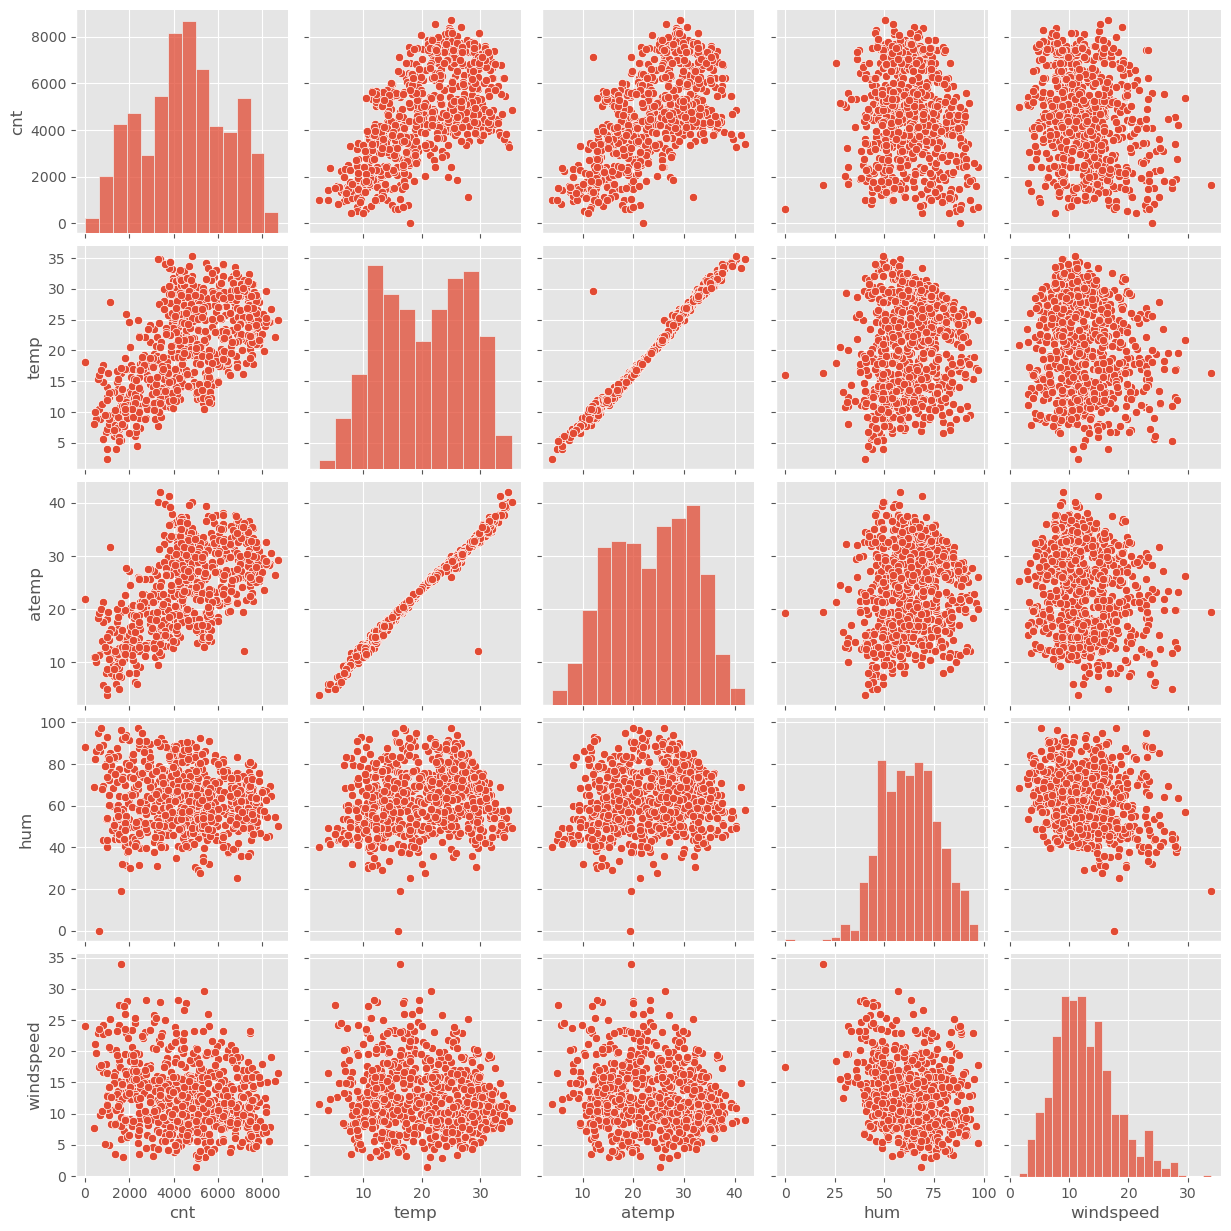

In [37]:
#Let us now check the relation between numerical variables and our target variable, cnt to check that if building a linear regression model makes sense
day_num_var=day[['cnt','temp','atemp','hum','windspeed']]
plt.figure(figsize=(20,15))
sns.pairplot(day_num_var)
plt.show()

- We can see some linear Relationship between temp and cnt similarly between atemp and cnt
- It does make sense to build a linear regression model for the dataset

#### Multivariate data analysis

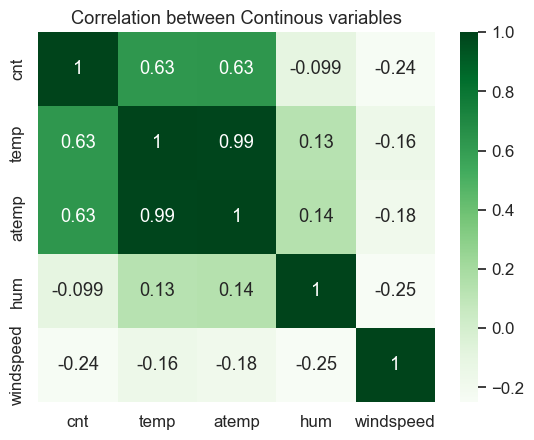

In [40]:
#Let us now draw a heatmap to check the correlation between the continous variables
corr_day_num_var=day_num_var.corr()
sns.set(font_scale=1.1)
sns.heatmap(corr_day_num_var, annot=True, cmap="Greens")
plt.title('Correlation between Continous variables')
plt.show()

- cnt is negatively corrlated with humidity and windspeed
- cnt is positively correlated with temp and actual temp


#### This concludes our EDA let us now move forward with Data preperation for model building

## Preparing the Data for Model

#### Dummy Variables
First of all let's create dummy variables for the categorical variables we need to create dummy variables for below variables:
- mnth
- season
- weekday
- weathersit

In [45]:
# creating dummy variables:
day_dummy=pd.get_dummies(day[['mnth','season','weekday','weathersit']],drop_first=True).astype(int)

In [46]:
day_dummy.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
#let's concat this dataframe with our main dataframe
day=pd.concat([day,day_dummy],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [48]:
day.shape

(730, 34)

In [49]:
#Since we have created dummy variables so now drop the 4 original columns:
day=day.drop(['season','mnth','weekday','weathersit'], axis=1)

In [50]:
#Feature count should decrease by 4, i.e. we should jhave 54 columns now
day.shape

(730, 30)

#### Splitting the data
We need to split the data into training and test data for this we will be splitiing the data into 70,30 ratio


In [52]:
# We have already imported train_test_split from sklearn.model_selection
day_train,day_test=train_test_split(day,train_size=0.7,test_size=0.3,random_state=42)
print(day_train.shape)
print(day_test.shape)

(510, 30)
(219, 30)


#### Rescaling
We need to rescale below 5 numeric varisbles and we will be using min-max scaling for this, the variables to be rescaled are:
- cnt
- temp
- atemp
- hum
- windspeed

In [54]:
#Initiating MinMaxScaler that we have already imported from sklearn.preprocessing
num_var=['cnt','temp','atemp','hum','windspeed']
scaler=MinMaxScaler()

In [55]:
day_train[num_var]=scaler.fit_transform(day_train[num_var])

In [56]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,1,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,1,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,...,1,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,1,0,0,0,0,0,1,0,1


In [57]:
day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.074510,0.074510,...,0.256863,0.250980,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216,0.029412,0.345098
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.262857,0.262857,...,0.437332,0.434003,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,0.000000,...,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the model

We will follow hybrid approach to here where we will first use 25 variables using RFE and then create the same model using statsmodel to get the summary of the model with that we will keep on eliminating the variables that seems non significant or has high vif.

#### Model 1

In [61]:
# Defining X_train and y_train
y_train=day_train['cnt']
X_train=day_train.drop(['cnt'],axis=1)


In [62]:
# We have already imported RFE from sklearn.feature_selection and LinearRegression from sklearn.linear_model
lm=LinearRegression()


In [63]:
lm.fit(X_train,y_train) #fitting the model first
rfe=RFE(estimator=lm, n_features_to_select=25) #passing the model to RFE with 25 variables
rfe=rfe.fit(X_train,y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 3),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

#### Model 1 using Statsmodel

Creating the same model using statsmodel to check the significance of the variables

In [67]:
col=X_train.columns[rfe.support_]

In [68]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'season_spring', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

In [69]:
X_train_rfe=X_train[col]

In [70]:
#adding constant to the model
X_train_rfe=sm.add_constant(X_train_rfe)

In [71]:
#Linear model using OLS
lm=sm.OLS(y_train,X_train_rfe).fit()

In [72]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.28e-180
Time:                        18:28:17   Log-Likelihood:                 496.84
No. Observations:                 510   AIC:                            -943.7
Df Residuals:                     485   BIC:                            -837.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [73]:
# let's look at the VIF too we have already imported variance_inflation_factor from outlier_influence of statsmodel
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
2,holiday,inf
3,workingday,inf
19,weekday_Sat,inf
20,weekday_Sun,inf
4,temp,187.72
5,atemp,185.28
16,season_spring,3.61
17,season_winter,2.48
6,hum,1.98
18,weekday_Mon,1.93


- highest p value:weekday_Thu
- highest VIF: holiday'
- Adjusted R_square 84%
- Let's drop the variable with highest p_values that weekday_Thu and created model 2

#### Model 2

In [76]:
X_train_rfe.shape

(510, 26)

In [77]:
X_train_2=X_train_rfe.drop(columns='weekday_Thu',axis=1)

In [78]:
X_train_2.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Aug,mnth_Dec,...,mnth_Sep,season_spring,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
683,1.0,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,...,0,0,1,0,0,0,0,0,0,1
645,1.0,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,...,0,0,1,1,0,0,0,0,0,1
163,1.0,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,...,0,0,0,1,0,0,0,0,0,0
360,1.0,0,0,1,0.331287,0.326273,0.785745,0.415925,0,1,...,0,1,0,0,0,0,1,0,0,1
640,1.0,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,...,0,0,1,0,0,0,0,1,0,1


In [79]:
# Training the model
X_train_2=sm.add_constant(X_train_2)
lm2=sm.OLS(y_train,X_train_2).fit()

In [80]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.30e-181
Time:                        18:28:18   Log-Likelihood:                 496.73
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     486   BIC:                            -843.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [81]:
# let's look at the VIF again:
vif=pd.DataFrame()
vif['features']=X_train_2.columns
vif['VIF']=[variance_inflation_factor(X_train_2.values,i) for i in range(X_train_2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
2,holiday,inf
3,workingday,inf
20,weekday_Sun,inf
19,weekday_Sat,inf
4,temp,187.71
5,atemp,185.28
16,season_spring,3.61
17,season_winter,2.48
6,hum,1.96
14,mnth_Nov,1.74


- highest p value:weekday_Wed
- highest VIF: holiday
- Adjusted R_square 84%
- Let's drop the variable with highest p_values that weekday_Wed and created model 3

#### Model 3

In [84]:
X_train_3=X_train_2.drop(columns='weekday_Wed',axis=1)

In [85]:
lm3=sm.OLS(y_train,X_train_3).fit()

In [86]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.22e-182
Time:                        18:28:19   Log-Likelihood:                 496.68
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     487   BIC:                            -850.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [87]:
#Checking if there's any change in VIF
vif=pd.DataFrame()
vif['features']=X_train_3.columns
vif['VIF']=[variance_inflation_factor(X_train_3.values,i) for i in range(X_train_3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
19,weekday_Sat,inf
2,holiday,inf
3,workingday,inf
20,weekday_Sun,inf
4,temp,186.75
5,atemp,184.29
16,season_spring,3.61
17,season_winter,2.48
6,hum,1.94
14,mnth_Nov,1.74


- highest p value:mnth_Feb
- highest VIF: weekday_Sat
- Adjusted R_square 84%
- Let's drop the variable with highest p_values that mnth_Feb and created model 4

#### Model 4

In [90]:
X_train_4=X_train_3.drop(columns='mnth_Feb',axis=1)

In [91]:
lm4=sm.OLS(y_train,X_train_4).fit()

In [92]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.22e-183
Time:                        18:28:20   Log-Likelihood:                 496.53
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     488   BIC:                            -855.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [93]:
#Checking VIF again:
vif=pd.DataFrame()
vif['features']=X_train_4.columns
vif['VIF']=[variance_inflation_factor(X_train_4.values,i) for i in range(X_train_4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
19,weekday_Sun,inf
2,holiday,inf
3,workingday,inf
18,weekday_Sat,inf
4,temp,185.83
5,atemp,183.37
15,season_spring,3.09
16,season_winter,2.48
6,hum,1.94
13,mnth_Nov,1.74


- highest p value:weekday_Wed                    
- highest VIF: holiday
- Adjusted R_square 84%
- Let's drop the varible holiday as it has high p value and highest VIF

#### Model 5

In [96]:
X_train_5=X_train_4.drop(columns='holiday',axis=1)

In [97]:
lm5=sm.OLS(y_train,X_train_5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.22e-183
Time:                        18:28:20   Log-Likelihood:                 496.53
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     488   BIC:                            -855.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [98]:
#Checking VIF again:
vif=pd.DataFrame()
vif['features']=X_train_5.columns
vif['VIF']=[variance_inflation_factor(X_train_5.values,i) for i in range(X_train_5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,temp,185.83
4,atemp,183.37
0,const,117.16
2,workingday,9.38
18,weekday_Sun,6.53
17,weekday_Sat,6.48
14,season_spring,3.09
15,season_winter,2.48
5,hum,1.94
12,mnth_Nov,1.74


- highest p value:temp                    
- highest VIF: temp
- Adjusted R_square 84|%
- Let's drop the varible temp as it has high p value and highest VIF

#### Model 6

In [101]:
X_train_6=X_train_5.drop(columns='temp',axis=1)

In [102]:
lm6=sm.OLS(y_train,X_train_6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.23e-184
Time:                        18:28:20   Log-Likelihood:                 496.35
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     489   BIC:                            -861.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [103]:
#Checking VIF again:
vif=pd.DataFrame()
vif['features']=X_train_6.columns
vif['VIF']=[variance_inflation_factor(X_train_6.values,i) for i in range(X_train_6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,117.06
2,workingday,9.30
17,weekday_Sun,6.48
16,weekday_Sat,6.43
3,atemp,3.96
13,season_spring,3.09
14,season_winter,2.46
4,hum,1.93
11,mnth_Nov,1.73
8,mnth_Jul,1.70


- highest p value:weekday_Sun                    
- highest VIF: workingday
- Adjusted R_square 84%
- Let's drop the varible weekday_Sun as it has highest p value and high VIF

#### Model 7

In [106]:
X_train_7=X_train_6.drop(columns='weekday_Sun',axis=1)

In [107]:
lm7=sm.OLS(y_train,X_train_7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.43e-185
Time:                        18:28:21   Log-Likelihood:                 495.99
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     490   BIC:                            -867.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [108]:
#checking VIF:
vif=pd.DataFrame()
vif['features']=X_train_7.columns
vif['VIF']=[variance_inflation_factor(X_train_7.values,i) for i in range(X_train_7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,81.53
3,atemp,3.96
13,season_spring,3.08
14,season_winter,2.46
4,hum,1.93
11,mnth_Nov,1.73
2,workingday,1.71
8,mnth_Jul,1.70
16,weekday_Sat,1.60
19,weathersit_Mist,1.59


- We have VIF under control now
- highest p value:mnth_Aug                    
- highest VIF: Contant
- Adjusted R_square 84%
- Let's drop the varible mnth_Aug as it has highest p value and high VIF

#### Model 8

In [111]:
X_train_8=X_train_7.drop(columns='mnth_Aug',axis=1)

In [112]:
lm8=sm.OLS(y_train,X_train_8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.93e-186
Time:                        18:28:21   Log-Likelihood:                 495.44
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     491   BIC:                            -872.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [113]:
#checking VIF:
vif=pd.DataFrame()
vif['features']=X_train_8.columns
vif['VIF']=[variance_inflation_factor(X_train_8.values,i) for i in range(X_train_8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,81.24
3,atemp,3.61
12,season_spring,3.08
13,season_winter,2.34
4,hum,1.93
10,mnth_Nov,1.73
2,workingday,1.71
15,weekday_Sat,1.60
18,weathersit_Mist,1.59
7,mnth_Jul,1.43


- Highest VIF: Constant but overall under control
- highest p value:mnth_Jan                    
- Adjusted R_square 84%
- Let's drop the varible weekday_Mon as it has highest p value.

#### Model 9

In [116]:
X_train_9=X_train_8.drop(columns='weekday_Mon',axis=1)

In [117]:
lm9=sm.OLS(y_train,X_train_9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.17e-187
Time:                        18:28:21   Log-Likelihood:                 494.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     492   BIC:                            -876.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [118]:
#checking VIF:
vif=pd.DataFrame()
vif['features']=X_train_9.columns
vif['VIF']=[variance_inflation_factor(X_train_9.values,i) for i in range(X_train_9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,81.24
3,atemp,3.61
12,season_spring,3.08
13,season_winter,2.34
4,hum,1.92
10,mnth_Nov,1.73
2,workingday,1.68
17,weathersit_Mist,1.59
14,weekday_Sat,1.58
7,mnth_Jul,1.43


- We have VIF under control now
- highest p value:weekday_Tue                    
- Adjusted R_square 84%
- Let's drop the varible weekday_Tue as it has highest p value.

#### Model 10

In [121]:
X_train_10=X_train_9.drop(columns='weekday_Tue',axis=1)

In [122]:
lm10=sm.OLS(y_train,X_train_10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.03e-187
Time:                        18:28:22   Log-Likelihood:                 493.16
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     493   BIC:                            -880.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [123]:
#checking VIF:
vif=pd.DataFrame()
vif['features']=X_train_10.columns
vif['VIF']=[variance_inflation_factor(X_train_10.values,i) for i in range(X_train_10.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,const,81.01
3,atemp,3.61
12,season_spring,3.08
13,season_winter,2.34
4,hum,1.91
10,mnth_Nov,1.73
2,workingday,1.60
16,weathersit_Mist,1.59
14,weekday_Sat,1.58
7,mnth_Jul,1.43


- We have VIF under control now, constant can be ignored
- p value of all variables is less than 0.05                    
- Adjusted R_square 84%
- We can consider this model as our final model, but we need a model with less number of independent variables so let's keep on removing few features and evaluate the R_square, in this case we will see the same after removing mnth_May

#### Model 11

In [126]:
X_train_11=X_train_10.drop(columns='mnth_May',axis=1)

In [127]:
lm11=sm.OLS(y_train,X_train_11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          7.32e-188
Time:                        18:28:22   Log-Likelihood:                 490.80
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     494   BIC:                            -881.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [128]:
# chacking VIF
vif=pd.DataFrame()
vif['features']=X_train_11.columns
vif['VIF']=[variance_inflation_factor(X_train_11.values,i) for i in range(X_train_11.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,80.86
3,atemp,3.61
11,season_spring,2.93
12,season_winter,2.19
4,hum,1.88
9,mnth_Nov,1.72
2,workingday,1.60
13,weekday_Sat,1.58
15,weathersit_Mist,1.58
7,mnth_Jul,1.36


- Not much decline in Adjusted R_square as it's still 83.9%
- Let's drop mnth_Mar and look at the model

#### Model 12

In [131]:
X_train_12=X_train_11.drop(columns='mnth_Mar',axis=1)

In [132]:
lm12=sm.OLS(y_train,X_train_12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.82e-187
Time:                        18:28:22   Log-Likelihood:                 487.12
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     495   BIC:                            -880.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [133]:
# chacking VIF
vif=pd.DataFrame()
vif['features']=X_train_12.columns
vif['VIF']=[variance_inflation_factor(X_train_12.values,i) for i in range(X_train_12.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,80.43
3,atemp,3.60
10,season_spring,2.89
11,season_winter,2.19
4,hum,1.88
8,mnth_Nov,1.72
2,workingday,1.60
12,weekday_Sat,1.58
14,weathersit_Mist,1.57
7,mnth_Jul,1.35


- Not much decline in Adjusted R_square as it's still 83.7%
- Let's drop mnth_Jul and look at the model

#### Model 13

In [136]:
X_train_13=X_train_12.drop(columns='mnth_Jul',axis=1)

In [137]:
lm_final=sm.OLS(y_train,X_train_13).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.77e-186
Time:                        18:28:22   Log-Likelihood:                 481.23
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     496   BIC:                            -875.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [138]:
# chacking VIF
vif=pd.DataFrame()
vif['features']=X_train_13.columns
vif['VIF']=[variance_inflation_factor(X_train_13.values,i) for i in range(X_train_13.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,80.02
3,atemp,3.09
9,season_spring,2.85
10,season_winter,2.18
4,hum,1.86
7,mnth_Nov,1.71
2,workingday,1.59
11,weekday_Sat,1.58
13,weathersit_Mist,1.57
12,weathersit_Light_Snow,1.29


- Not much decline in Adjusted R_square as it's still 83.7%
- Let's drop mnth_Jul and look at the model
- This will be our final model for the predictions as we are using 13 independent variables and have a good R_square of 83.3%

### Our final equation will be:
### cnt=0.3112 + 0.2370*yr + 0.0492*workingday + 0.4088*atemp - 0.154*hum - 0.106*windspeed - 0.0738*mnth_Dec - 0.0907*mnth_Nov + 0.0651*mnth_Sep - 0.159*season_sprig + 0.0901*season_winter + 0.0538*weekday_Sat - 0.2275*weathersit_Light_Snow - 0.0557*weathersit_Mist

## Residual Analysis

Let's validate our model by doind residual analysis, basically we will be plotiing a histogram for the errors

In [143]:
#Doing the predictions on training data
y_train_pred=lm_final.predict(X_train_13)

In [144]:
#calculating the Residuals
residual=y_train-y_train_pred

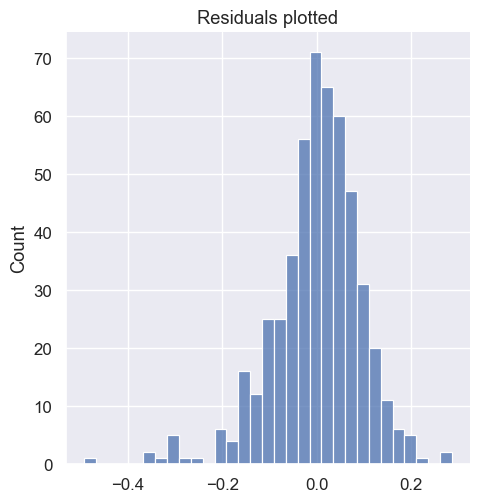

In [145]:
#plottinh histogram
sns.displot(residual)
plt.title('Residuals plotted')
plt.show()

- Residuals follows normal distribution
- The mean is centered around 0
- We can say that our model is predicting values correctly

## Predictions and evaluating model on the test set

Before moving on to do predictions and evaluating the test data we need to perform the preprocessing steps on the test data:
- Transforming Test Data(Rescaling)
- Dropping non-significant columns(Dropping the columns not used in the model)
- Predicting y_test using the model
- Checking R_square

#### Transforming Test Data(Rescaling)

In [150]:
# Rescaling the test data
day_test[num_var]=scaler.transform(day_test[num_var])

In [151]:
day_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,0,...,1,0,0,1,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,0,...,1,0,0,0,1,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,1,0,0,1,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,1,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,0,...,1,0,0,0,0,1,0,0,0,0


In [152]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.109589,0.109589,...,0.237443,0.228311,0.132420,0.127854,0.123288,0.132420,0.168950,0.141553,0.027397,0.315068
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.313092,0.313092,...,0.426491,0.420705,0.339723,0.334692,0.329520,0.339723,0.375566,0.349389,0.163612,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
# Defining y_test and X_test
y_test=day_test['cnt']
X_test=day_test.drop(columns='cnt',axis=1)

In [154]:
#Adding constant to X_test
X_test=sm.add_constant(X_test)
X_test.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_Aug,mnth_Dec,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist
468,1.0,1,0,0,0.543115,0.536771,0.518248,0.422104,0,0,...,1,0,0,1,0,0,0,0,0,0
148,1.0,0,0,0,0.758058,0.704203,0.843709,0.479765,0,0,...,1,0,0,0,1,0,0,0,0,0
302,1.0,0,0,0,0.324018,0.317998,0.642765,0.386287,0,0,...,0,1,0,0,1,0,0,0,0,0
355,1.0,0,0,1,0.453814,0.455552,0.780592,0.062325,0,1,...,0,0,0,0,0,1,0,0,0,1
515,1.0,1,0,1,0.773634,0.724915,0.507943,0.433030,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Dropping non-significant columns

In [156]:
# Creating a list of variables to be dropped
drop_var=['mnth_Jan', 'mnth_Jun', 'mnth_Oct', 'season_summer','mnth_Jul','mnth_Mar','mnth_Mar','mnth_May','weekday_Tue','weekday_Mon','mnth_Aug','weekday_Sun','temp','holiday','mnth_Feb','weekday_Wed','weekday_Thu']

In [157]:
#Dropping the columns
X_test=X_test.drop(columns=drop_var,axis=1)

#### Predicting y_test using the model

In [159]:
#Let us check X_train and X_test has same shape
print(X_test.shape)
print(X_train_13.shape)

(219, 14)
(510, 14)


In [160]:
#predicting y_test
y_test_pred=lm_final.predict(X_test)

#### Checking R_square

In [162]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8269883879729416

- The value coming out to be 82.6% which is close enough to the value of R_square in training set which was 83.3%
- We can conclude that model is doing correct predictions on the test data too

### We can use below equation to predict the cnt and use the same to increase the cnt and eventually the revenue:
### cnt=0.3112 + 0.2370*yr + 0.0492*workingday + 0.4088*atemp - 0.154*hum - 0.106*windspeed - 0.0738*mnth_Dec - 0.0907*mnth_Nov + 0.0651*mnth_Sep - 0.159*season_sprig + 0.0901*season_winter + 0.0538*weekday_Sat - 0.2275*weathersit_Light_Snow - 0.0557*weathersit_Mist

- On a relatively hotter day the bike usage is likely to increase, as the cnt will increase by 0.4088 with 1 unint increase in atemp
- During winters and on saturdays the bike usage is supposed to increase.
- Bikes are being preferred during the workingday as compared to the holidays meaning bikes are being used for commute to and from offices
- windspeed, hum, season_sprig, weathersit_Light_Snow, weathersit_Mist impacting the bike usage neagtively